In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Chocolatina's album problem"

How many sheets on average should an agent buy to fill its album?

699
0


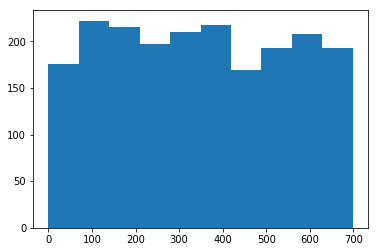

In [2]:
from random_generator import RandomGenerator

rg = RandomGenerator('uniform', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

699
0


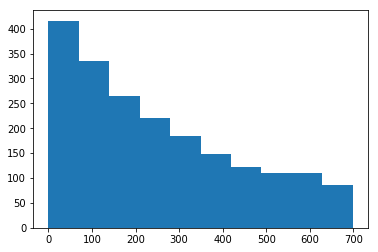

In [3]:
rg = RandomGenerator('exponential', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

8
0


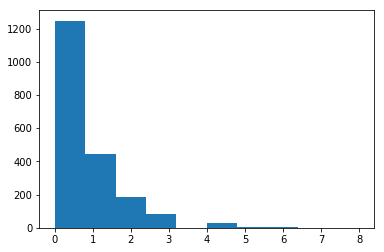

In [4]:
rg = RandomGenerator('custom', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

## Data analysis

In [5]:
df = pd.read_csv("data/data.csv")
df.head()

,distribution,time,sheets,id,friends,surplus,purchased,agents,full_agents,stage
0,exponential,75,20,0,0,56,76,2,1,buy
1,exponential,169,20,1,2,150,170,2,2,buy
2,exponential,27,10,0,0,18,28,2,1,buy
3,exponential,113,10,1,2,104,114,2,2,buy
4,exponential,63,20,2,0,44,64,5,1,buy


In [6]:
exp = df[df['distribution'] == 'exponential']
uni = df[df['distribution'] == 'uniform']

In [7]:
exp.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,2105.356828,300.414097,16.895154,32.535683,1935.251101,2106.356828,33.461674,17.596476
std,3728.647806,410.622732,13.471589,21.163975,3529.795659,3728.647806,16.003254,13.641194
min,9.000000,10.000000,0.000000,0.000000,4.000000,10.000000,2.000000,1.000000
25%,172.000000,50.000000,5.000000,14.000000,153.000000,173.000000,20.000000,6.000000
50%,703.000000,100.000000,14.000000,29.000000,625.000000,704.000000,30.000000,15.000000
75%,2168.000000,400.000000,26.000000,52.000000,1933.000000,2169.000000,50.000000,27.000000
max,35025.000000,1400.000000,49.000000,76.000000,34258.000000,35026.000000,50.000000,50.000000


In [8]:
uni.describe()

,time,sheets,id,friends,surplus,purchased,agents,full_agents
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,950.606061,369.090909,15.779221,28.943723,741.619048,951.606061,30.506494,16.112554
std,1174.618415,311.490080,13.333653,20.608558,1024.845262,1174.618415,16.163447,13.240488
min,18.000000,20.000000,0.000000,0.000000,7.000000,19.000000,2.000000,1.000000
25%,136.250000,100.000000,5.000000,13.000000,85.250000,137.250000,20.000000,5.000000
50%,483.000000,100.000000,12.000000,26.000000,384.000000,484.000000,30.000000,13.000000
75%,1226.000000,700.000000,24.000000,44.000000,862.500000,1227.000000,50.000000,24.000000
max,5292.000000,700.000000,49.000000,76.000000,4616.000000,5293.000000,50.000000,50.000000


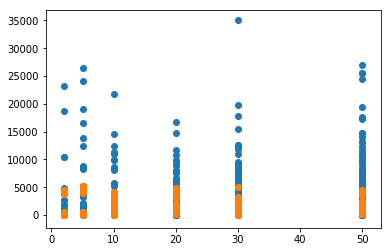

In [9]:
plt.scatter(exp['agents'], exp['time'])
plt.scatter(uni['agents'], uni['time'])

In [12]:
agents = df['agents'].unique()
distributions = df['distribution'].unique()
sheets = df['sheets'].unique()

In [17]:
exp[(exp['agents'] == 2) | (exp['agents'] == 10) | (exp['agents'] == 50)][["time", "surplus", "agents", "purchased", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets']).describe()

time                                      \
                           count          mean          std      min   
agents distribution sheets                                             
2      exponential  10       4.0     70.000000    49.652123     27.0   
                    20       2.0    122.000000    66.468037     75.0   
                    50       4.0    507.000000    73.900834    443.0   
                    100      2.0   1113.500000   166.170094    996.0   
                    200      4.0   2260.500000   560.607111   1775.0   
                    400      2.0   4655.500000   279.307179   4458.0   
                    700      2.0  10368.500000    13.435029  10359.0   
                    1400     2.0  20958.500000  3226.528243  18677.0   
10     exponential  10      10.0     77.700000    86.127877     18.0   
                    20       8.0    124.375000    61.103980     52.0   
                    50      20.0    422.000000   308.069712    138.0   
                    100      9.0    666.777778   495.753663    313.0   
                    200     20.0   1796.400000  1522.589913    628.0   
                    400      9.0   2859.666667  1281.148801   1623.0   
                    700      9.0   5414.444444  3674.735300   2752.0   
                    1400     9.0  10937.444444  4712.998491   5839.0   
50     exponential  10      80.0     74.375000    57.792158     11.0   
                    20      43.0    120.697674    87.696591     23.0   
                    50      94.0    394.021277   275.872301     80.0   
                    100     43.0    714.162791   688.622536    227.0   
                    200     88.0   1081.340909   668.138878    360.0   
                    400     47.0   2644.531915  2297.661267    940.0   
                    700     47.0   4385.021277  3072.633564   1722.0   
                    1400    46.0   9514.521739  6325.585347   4012.0   

                                                                 surplus  \
                                 25%      50%       75%      max   count   
agents distribution sheets                                                 
2      exponential  10         27.00     70.0    113.00    113.0     4.0   
                    20         98.50    122.0    145.50    169.0     2.0   
                    50        443.00    507.0    571.00    571.0     4.0   
                    100      1054.75   1113.5   1172.25   1231.0     2.0   
                    200      1775.00   2260.5   2746.00   2746.0     4.0   
                    400      4556.75   4655.5   4754.25   4853.0     2.0   
                    700     10363.75  10368.5  10373.25  10378.0     2.0   
                    1400    19817.75  20958.5  22099.25  23240.0     2.0   
10     exponential  10         24.25     51.5     88.25    304.0    10.0   
                    20         87.75    114.0    153.25    213.0     8.0   
                    50        226.00    307.0    516.00   1187.0    20.0   
                    100       360.00    467.0    653.00   1819.0     9.0   
                    200       721.00   1318.5   1761.00   5517.0    20.0   
                    400      1952.00   2150.0   4120.00   5154.0     9.0   
                    700      3165.00   3651.0   5466.00  12389.0     9.0   
                    1400     8499.00   9831.0  11251.00  21721.0     9.0   
50     exponential  10         30.50     53.5    102.75    231.0    80.0   
                    20         51.50     92.0    174.50    334.0    43.0   
                    50        167.25    303.0    532.50   1229.0    94.0   
                    100       348.50    466.0    762.00   3492.0    43.0   
                    200       737.75    881.0   1178.25   4363.0    88.0   
                    400      1383.50   1658.0   2696.00  13046.0    47.0   
                    700      2523.50   3578.0   4616.50  17689.0    47.0   
                    1400     5213.50   6457.0  12281.50  27021.0    46.0   

                              

In [ ]:
agg = df[["time", "surplus", "agents", "purchased", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets'])
final = agg.mean()
final